In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

seed = 420
wine_data = np.genfromtxt('winequality-red-3.csv', delimiter=';',dtype=None, encoding=None)

header = wine_data[0]
wine_data = wine_data[1:].astype(float)

print("Header:", header)
print("Data:", wine_data)

Header: ['"fixed acidity' '""volatile acidity""' '""citric acid""'
 '""residual sugar""' '""chlorides""' '""free sulfur dioxide""'
 '""total sulfur dioxide""' '""density""' '""pH""' '""sulphates""'
 '""alcohol""' '""quality"""']
Data: [[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


In [2]:

# Exploratory Data analysis portion

max_by_columns = np.max(wine_data,axis=0)
min_by_columns = np.min(wine_data,axis=0)
averages = np.mean(wine_data,axis=0)


print("Max Vals: ", max_by_columns)
print("Min Vals: ", min_by_columns)
print("Average Vals: ", averages)

Max Vals:  [ 15.9       1.58      1.       15.5       0.611    72.      289.
   1.00369   4.01      2.       14.9       8.     ]
Min Vals:  [4.6     0.12    0.      0.9     0.012   1.      6.      0.99007 2.74
 0.33    8.4     3.     ]
Average Vals:  [ 8.31963727  0.52782051  0.27097561  2.5388055   0.08746654 15.87492183
 46.46779237  0.99674668  3.3111132   0.65814884 10.42298311  5.63602251]


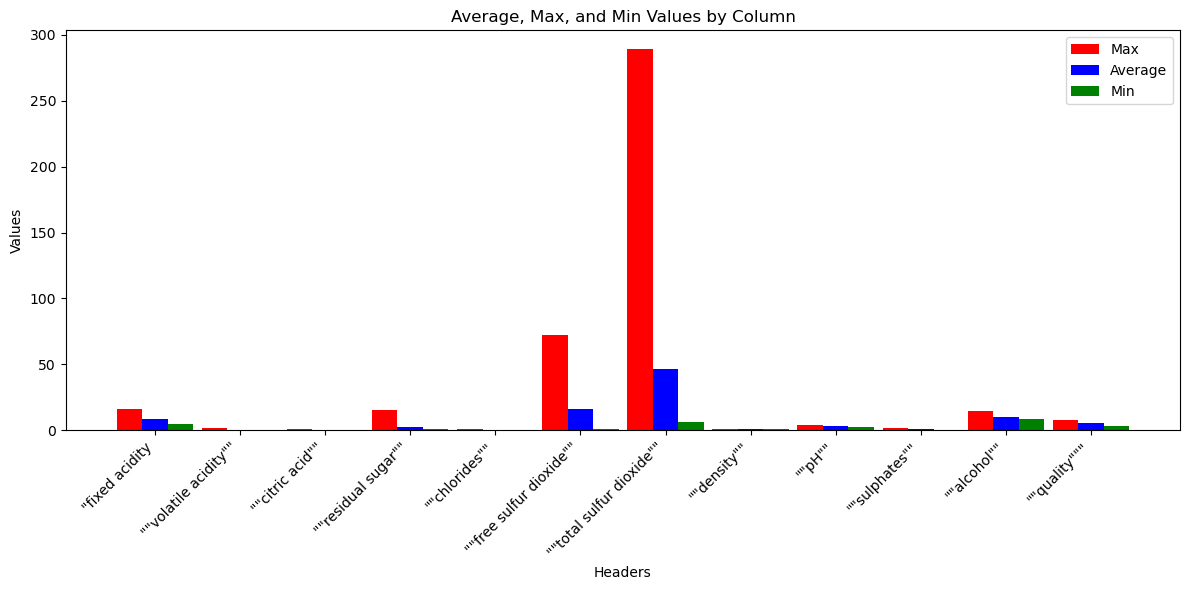

In [3]:
x = np.arange(len(header))  # the label locations

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for max, min, and averages
bar_width = 0.3
ax.bar(x - bar_width, max_by_columns, width=bar_width, label='Max', color='red')
ax.bar(x, averages, width=bar_width, label='Average', color='blue')
ax.bar(x + bar_width, min_by_columns, width=bar_width, label='Min', color='green')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Headers')
ax.set_ylabel('Values')
ax.set_title('Average, Max, and Min Values by Column')
ax.set_xticks(x)
ax.set_xticklabels(header, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [4]:
wine_data_input = wine_data[0:,:11].astype(float)
wine_data_output = wine_data[0:,11:].astype(float)
print("Data input:", wine_data_input)
print("Data Output:", wine_data_output)

Data input: [[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
Data Output: [[5.]
 [5.]
 [5.]
 ...
 [6.]
 [5.]
 [6.]]


In [5]:
# xtr_temp,xte,ytr_temp,yte=train_test_split(wine_data_input, wine_data_output, test_size=0.3, random_state=seed)

In [6]:
# xtr, xval, ytr, yval = train_test_split(xtr_temp, ytr_temp, test_size=0.2, random_state=seed)

In [7]:
xtr,xte,ytr,yte=train_test_split(wine_data_input, wine_data_output, test_size=0.3, random_state=seed)

In [8]:
neighList = list()
accList = list()
bestAccVal= float('-inf')
bestNeigh = 0;

In [9]:
kNNparams={
    'n_neighbors' : [i for i in range(10, 700, 5)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan','nan_euclidean']
}


In [10]:
# for i in range(10, 500, 1):
#     kNNModel = KNeighborsClassifier(n_neighbors=i)
#     kNNModel.fit(xtr,ytr.ravel())
#     ypred = kNNModel.predict(xval)
#     curAcc = metrics.accuracy_score(yval, ypred)
#     neighList.append(i)
#     accList.append(curAcc)
#     if curAcc > bestAccVal:
#         bestAcc = curAcc
#         bestNeigh = i

In [11]:
kNNModel = KNeighborsClassifier()

In [12]:
kNNHyperTune = GridSearchCV(kNNModel, kNNparams, cv=5, scoring='accuracy')
kNNHyperTune.fit(xtr, ytr.ravel())
tunedParams = kNNHyperTune.best_params_
print("Tuned hyperparameters:", tunedParams)
bestModel = kNNHyperTune.best_estimator_
accuracy = bestModel.score(xte, yte)
print("Best model accuracy:", accuracy)

Tuned hyperparameters: {'metric': 'manhattan', 'n_neighbors': 85, 'weights': 'distance'}
Best model accuracy: 0.6395833333333333


In [13]:
knnMetircAccList=list()
knnMetricList=list()
knnNeighList=list()
knnNeighAccList=list()

In [14]:
for aDistMetric in ['euclidean', 'manhattan','nan_euclidean']:
    knnforGraphing = KNeighborsClassifier(n_neighbors=tunedParams.get('n_neighbors'),metric=aDistMetric,weights=tunedParams.get('weights'))
    knnforGraphing.fit(xtr,ytr.ravel())
    ypred = knnforGraphing.predict(xte)
    knnMetircAccList.append(metrics.accuracy_score(yte, ypred))
    knnMetricList.append(aDistMetric)

for i in range(10, 700, 5):
    knnforGraphing = KNeighborsClassifier(n_neighbors=i,metric=tunedParams.get('metric'),weights=tunedParams.get('weights'))
    knnforGraphing.fit(xtr,ytr.ravel())
    ypred = knnforGraphing.predict(xte)
    knnNeighAccList.append(metrics.accuracy_score(yte, ypred))
    knnNeighList.append(i)

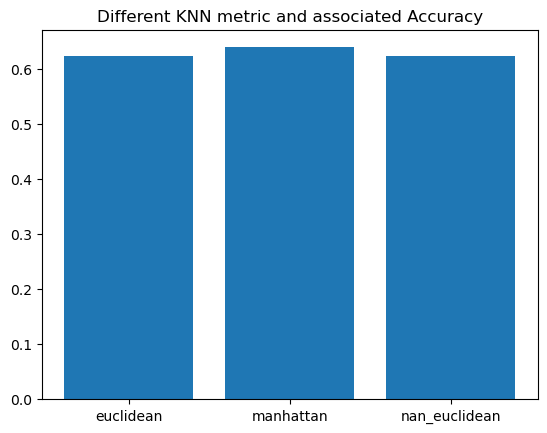

In [15]:
plt.bar(knnMetricList, knnMetircAccList)
plt.title("Different KNN metric and associated Accuracy")
plt.show()

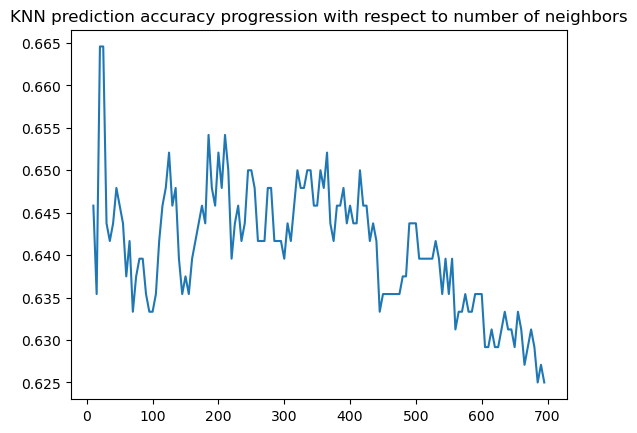

In [16]:
plt.plot(knnNeighList, knnNeighAccList)
plt.title("KNN prediction accuracy progression with respect to number of neighbors")
plt.show()

In [17]:
#print(f'best acc: {bestAcc}, best neigh: {bestNeigh}')

In [18]:
# kNNModel = KNeighborsClassifier(n_neighbors=bestNeigh)
# kNNModel.fit(xtr,ytr.ravel())
# ypred = kNNModel.predict(xte)
# curAcc = metrics.accuracy_score(yte, ypred)
# print(f'test set accuracy: {curAcc}')